In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
covid=pd.read_csv('Country_wide_covid-19.csv')
covid.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [3]:
df=pd.DataFrame(data=covid)
df.tail()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0
6602,2020-05-18,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0


In [4]:
df.columns

Index(['Date', 'Country', 'Population', 'Total Tests', 'Total Cases',
       'Total Deaths', 'Total Recovered', 'Serious or Critical',
       'Active Cases'],
      dtype='object')

In [5]:
df.dtypes

Date                    object
Country                 object
Population               int64
Total Tests            float64
Total Cases            float64
Total Deaths           float64
Total Recovered        float64
Serious or Critical    float64
Active Cases           float64
dtype: object

In [6]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Population'], dtype='object'),
 dtype('float64'): Index(['Total Tests', 'Total Cases', 'Total Deaths', 'Total Recovered',
        'Serious or Critical', 'Active Cases'],
       dtype='object'),
 dtype('O'): Index(['Date', 'Country'], dtype='object')}

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
Date                   6603 non-null object
Country                6603 non-null object
Population             6603 non-null int64
Total Tests            5505 non-null float64
Total Cases            6554 non-null float64
Total Deaths           5367 non-null float64
Total Recovered        6318 non-null float64
Serious or Critical    4117 non-null float64
Active Cases           6544 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 464.4+ KB


In [8]:
df.shape

(6603, 9)

In [9]:
df.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,6.603000e+03,5.505000e+03,6.554000e+03,5367.000000,6318.000000,4117.000000,6.544000e+03
mean,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03
std,1.411537e+08,7.595143e+05,8.861467e+04,6645.247810,23467.641235,1658.428324,6.541025e+04
min,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00
25%,8.672680e+05,2.690000e+03,7.900000e+01,6.000000,26.000000,3.000000,2.600000e+01
50%,6.859926e+06,2.547800e+04,6.135000e+02,24.000000,219.000000,13.000000,2.720000e+02
75%,2.546422e+07,1.437810e+05,4.877500e+03,199.000000,1394.750000,89.000000,2.041000e+03
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06


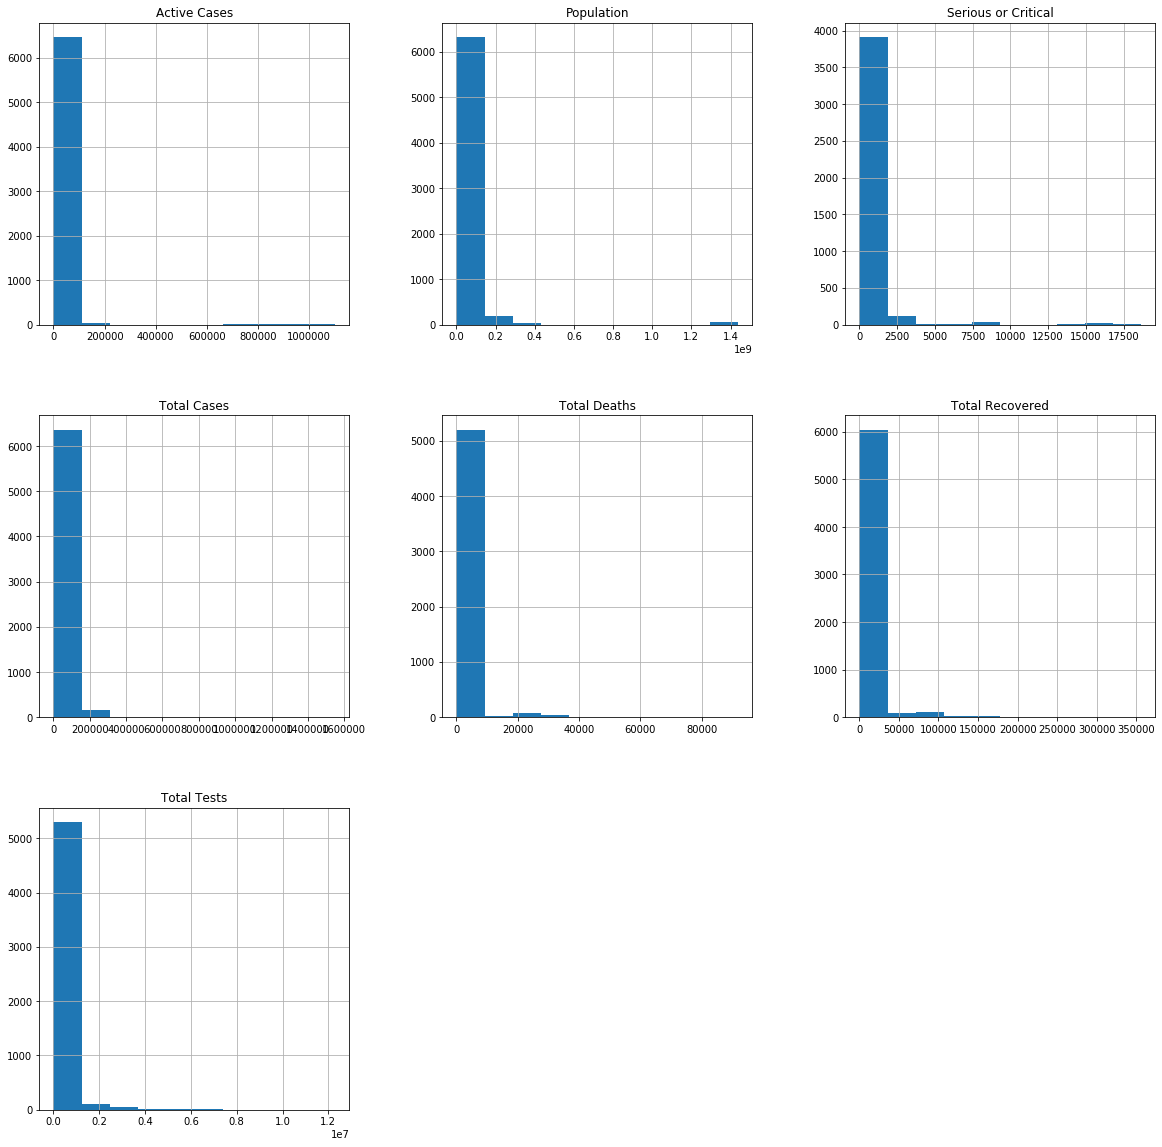

In [10]:
df.hist(figsize=(20,20))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x22f59a95048>,
 'caps': [<matplotlib.lines.Line2D at 0x22f59b0ce08>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f59b0a3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x22f59b0dd88>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f59b0de88>],
 'means': []}

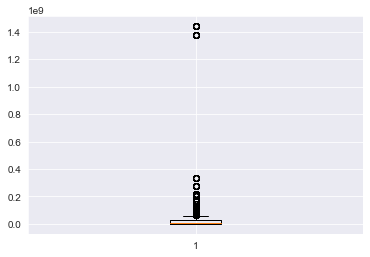

In [164]:
plt.boxplot(df['Population'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x22f59230dc8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x22f59224cc8>,
 'cmins': <matplotlib.collections.LineCollection at 0x22f59237d08>,
 'cbars': <matplotlib.collections.LineCollection at 0x22f59237c88>}

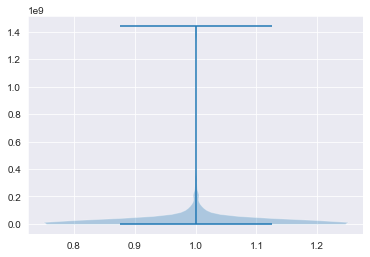

In [165]:
plt.violinplot(df['Population'])

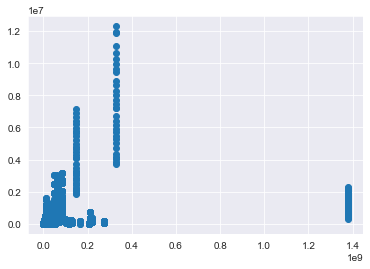

In [166]:
plt.scatter('Population','Total Tests',data=df)

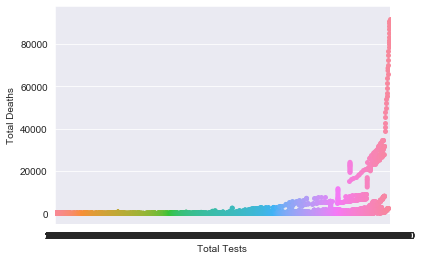

In [129]:
sns.stripplot('Total Tests','Total Deaths',data=df)

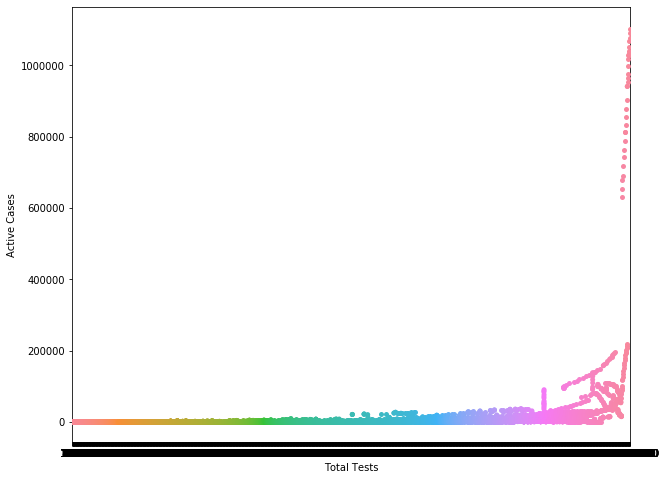

In [132]:
plt.figure(figsize=(10,8))
sns.swarmplot('Total Tests','Active Cases',data=df)

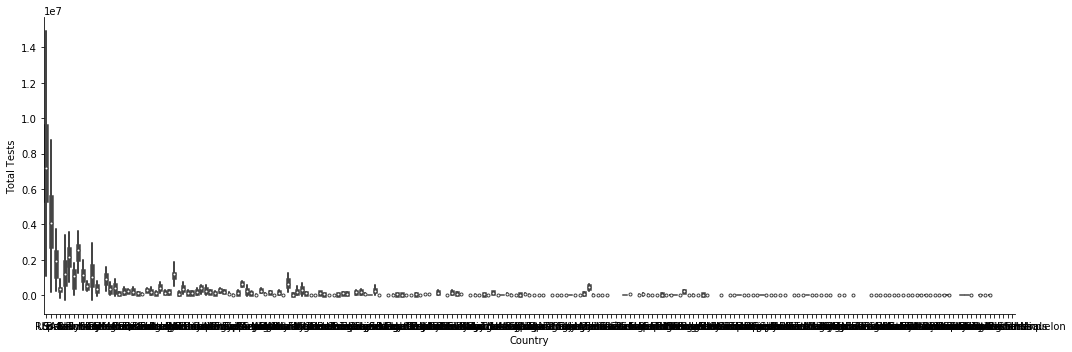

In [133]:
sns.catplot('Country','Total Tests',height=5,aspect=3,data=df,kind='violin')

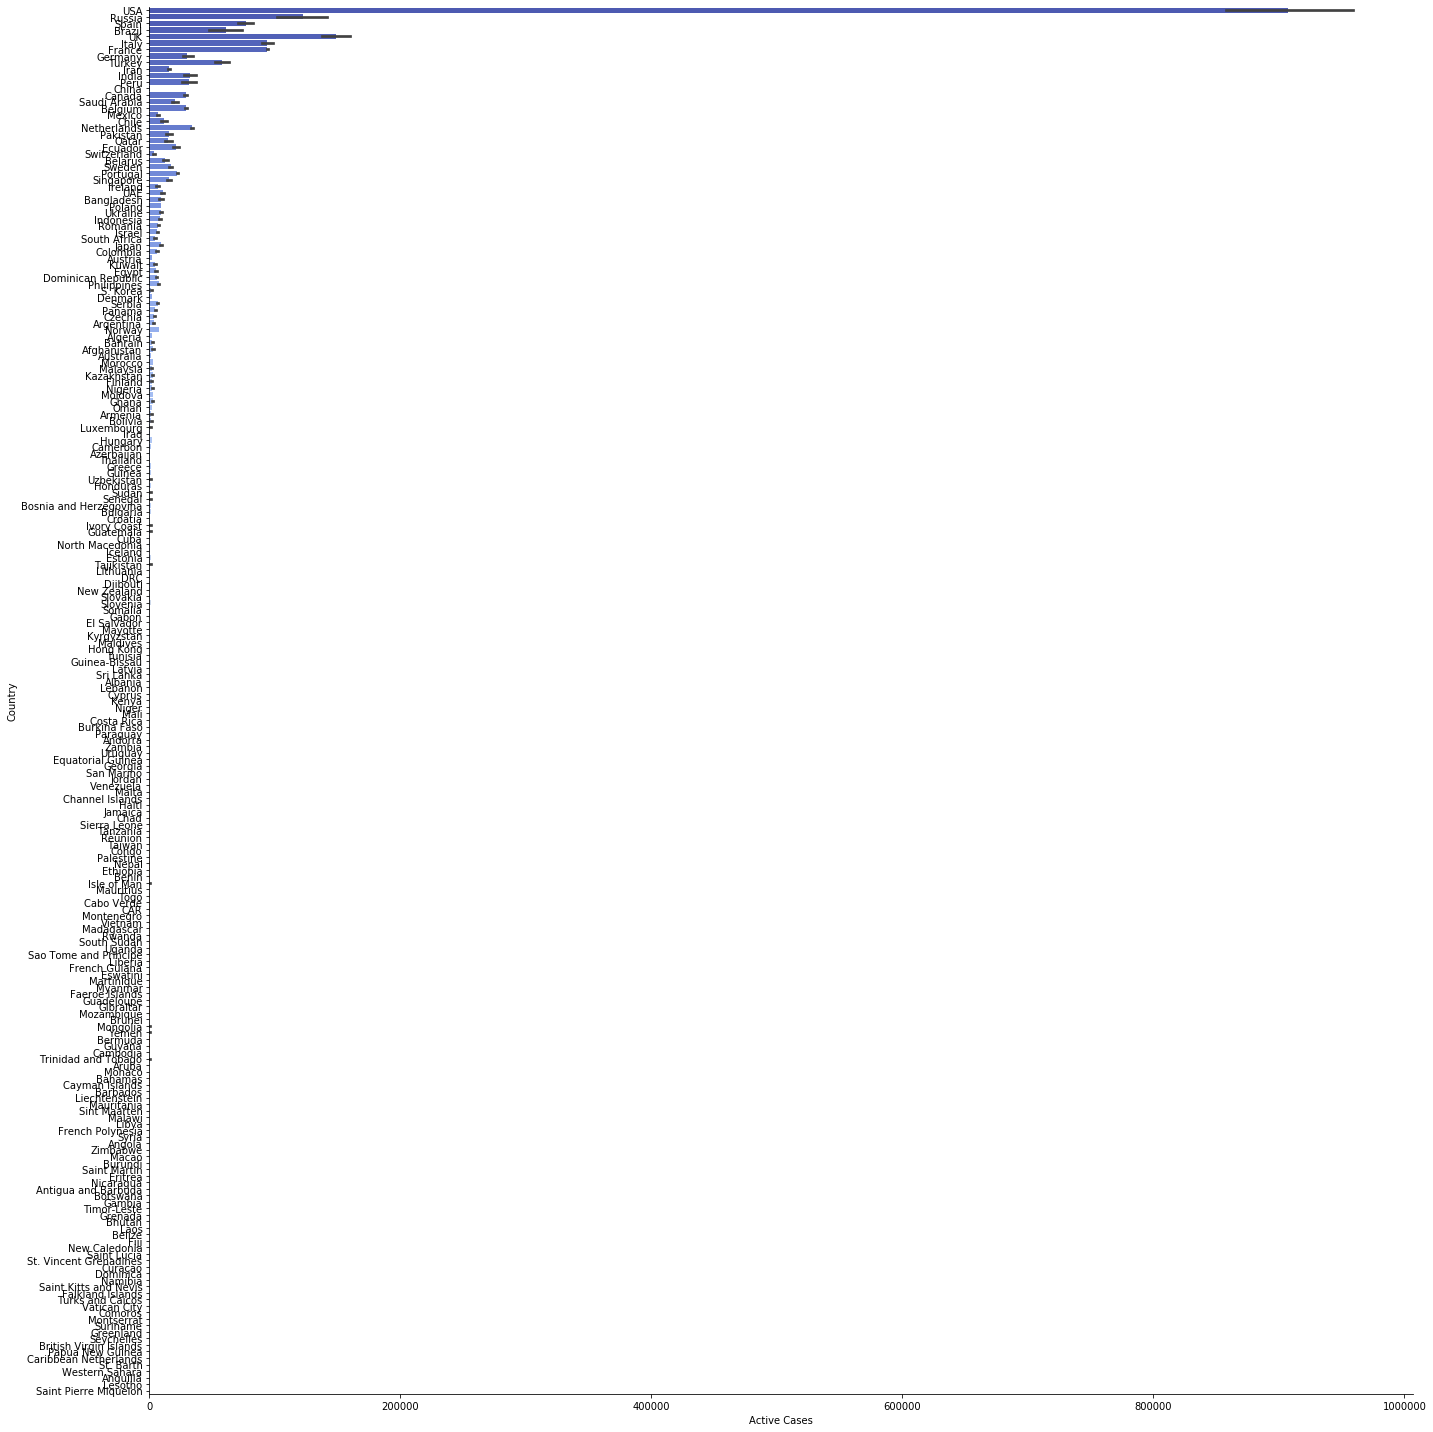

In [146]:
sns.catplot('Active Cases','Country',height=20,data=df,palette='coolwarm',kind='bar')

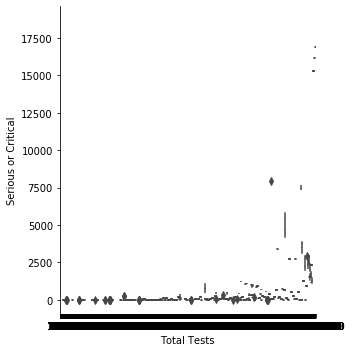

In [148]:
sns.catplot('Total Tests','Serious or Critical',data=df,palette='rainbow',kind='box')

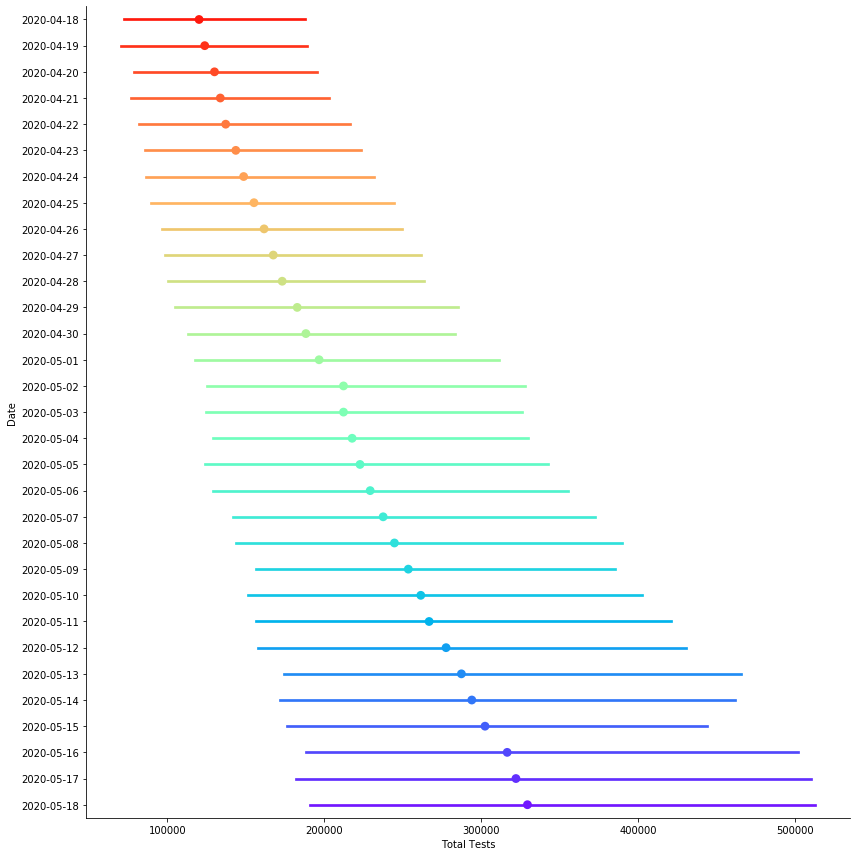

In [15]:
sns.catplot('Total Tests','Date',height=12,data=df,palette='rainbow_r',kind='point')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


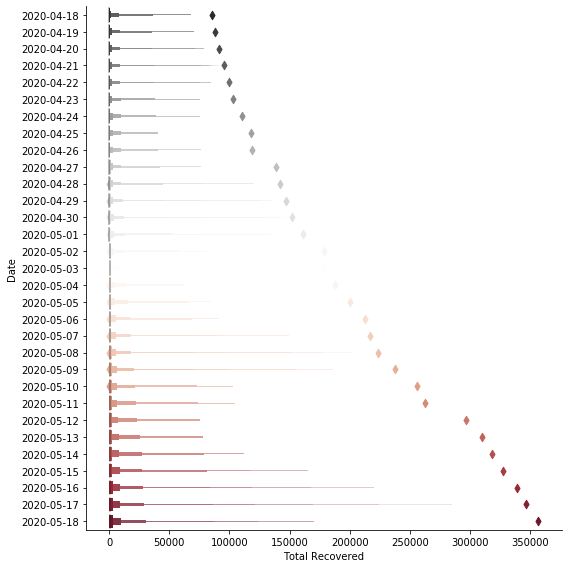

In [25]:
sns.catplot('Total Recovered','Date',data=df,height=8,palette='RdGy_r',kind='boxen')

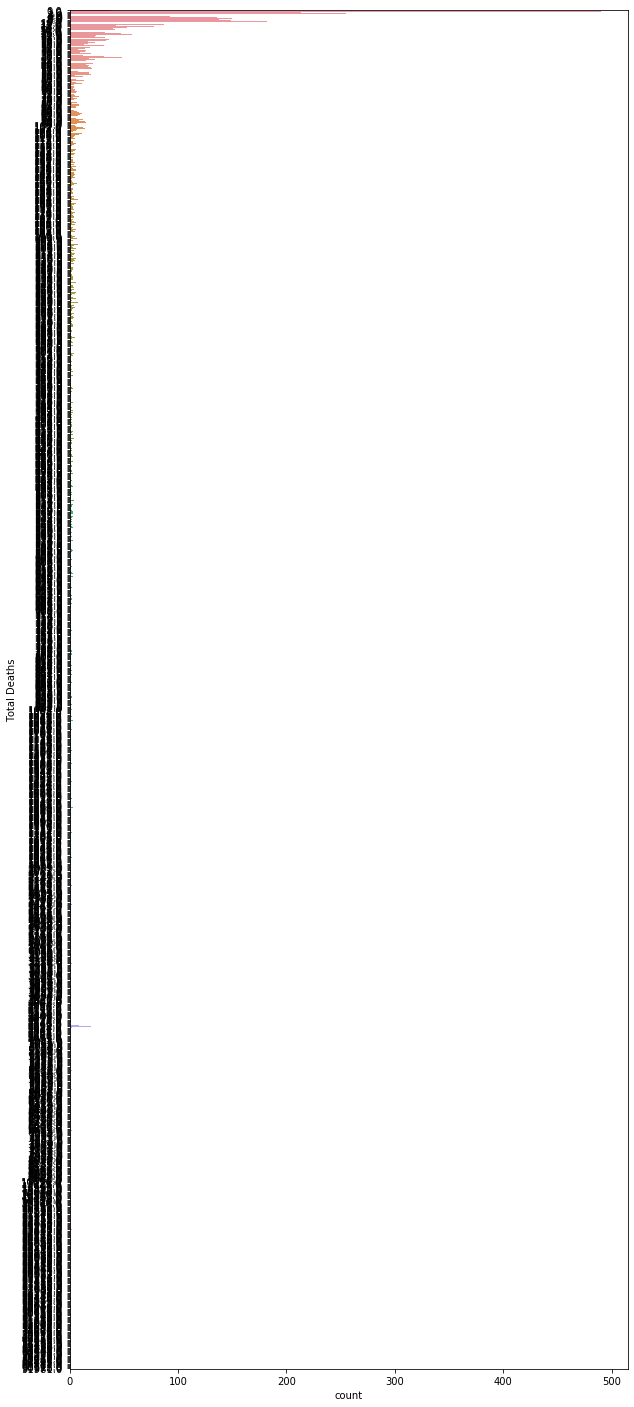

In [30]:
plt.figure(figsize=(10,25))
sns.countplot(y='Total Deaths',data=df)

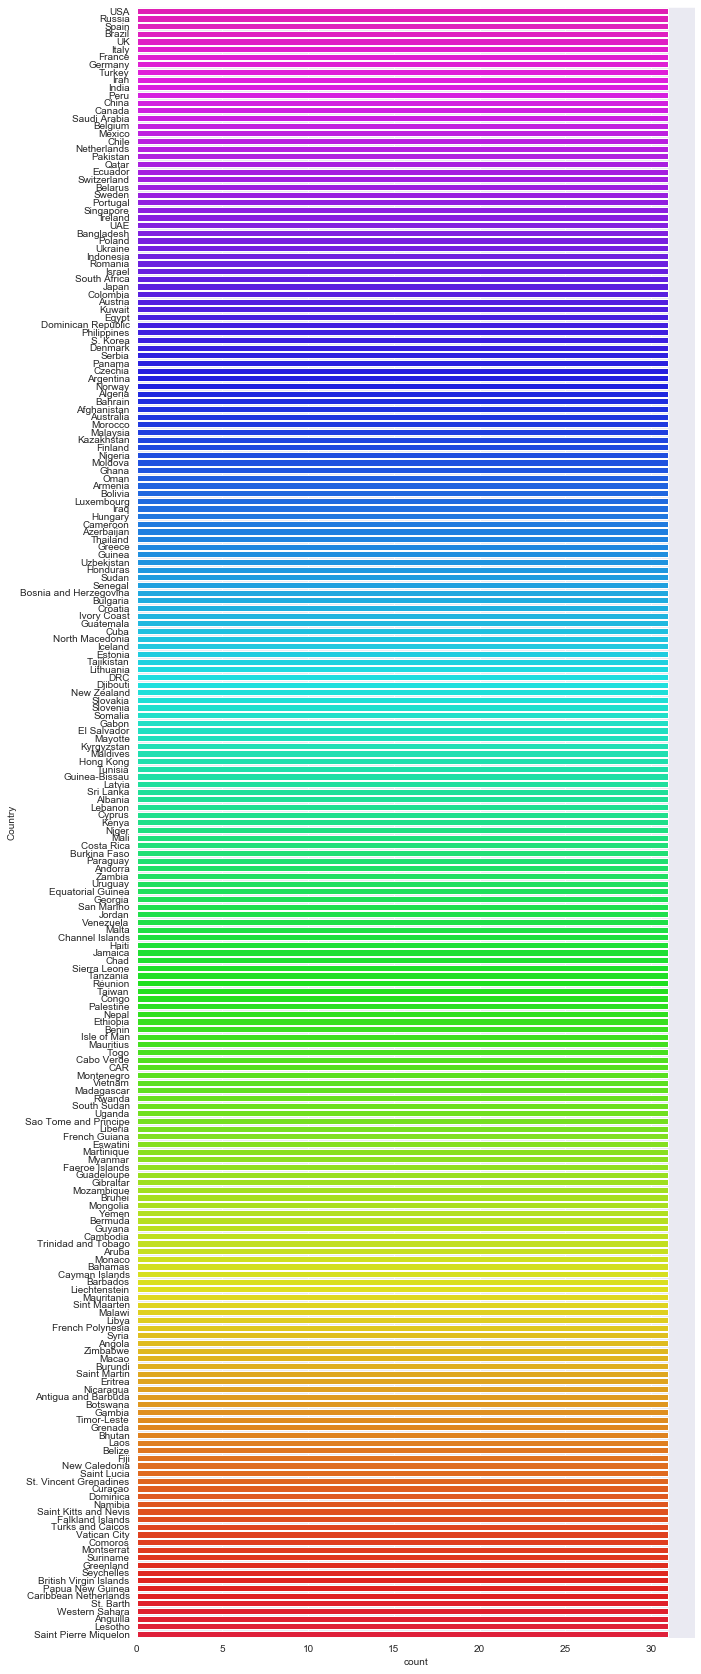

In [38]:
plt.figure(figsize=(10,30))
sns.set_style('darkgrid')
sns.countplot(y='Country',data=df,palette='gist_rainbow_r')

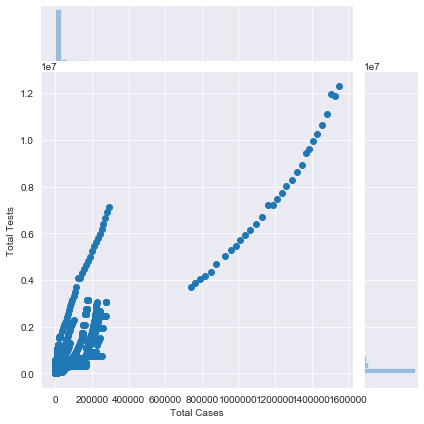

In [41]:
sns.jointplot('Total Cases','Total Tests',height=6,ratio=5,space=.2,data=df,kind='scatter')

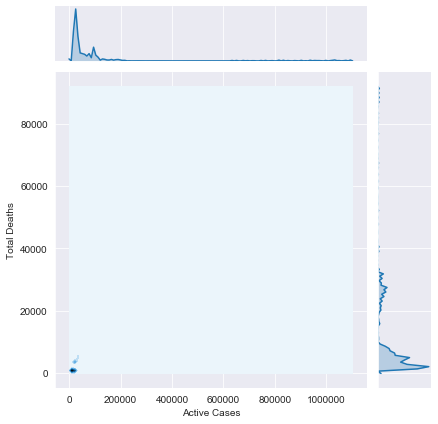

In [48]:
sns.jointplot('Active Cases','Total Deaths',height=6,ratio=5,space=.2,data=df,kind='kde')

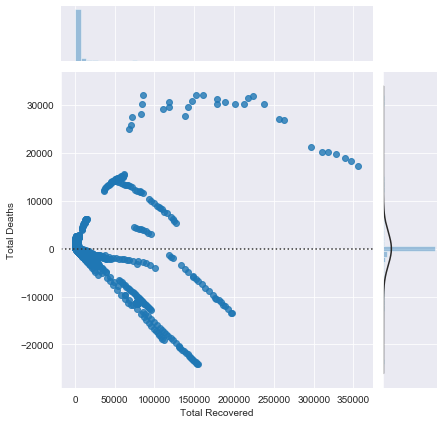

In [49]:
sns.jointplot('Total Recovered','Total Deaths',data=df,kind='resid')

In [11]:
df.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

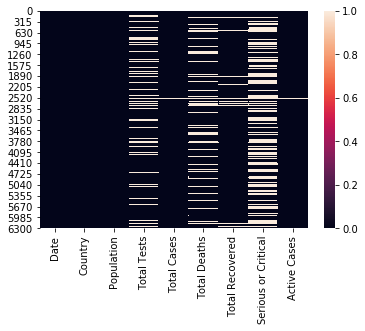

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.dropna(axis=0,how='any',inplace=True)

In [14]:
df.isnull().sum()

Date                   0
Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
dtype: int64

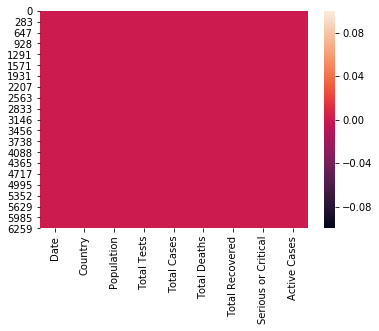

In [15]:
sns.heatmap(df.isnull())

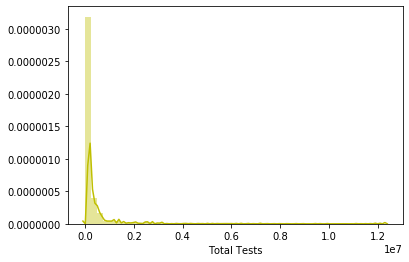

In [16]:
sns.distplot(df['Total Tests'],color='y')

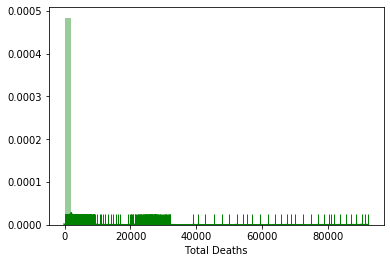

In [17]:
sns.distplot(df['Total Deaths'],color='g',rug=True)

In [18]:
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
5,2020-04-18,Italy,60471924,1305833.0,175925.0,23227.0,44927.0,2733.0,107771.0


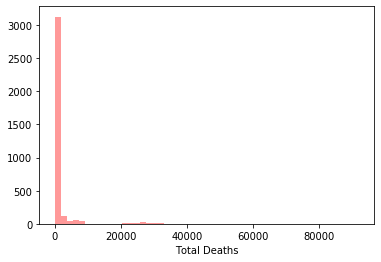

In [19]:
sns.distplot(df['Total Deaths'],color='r',kde=False)

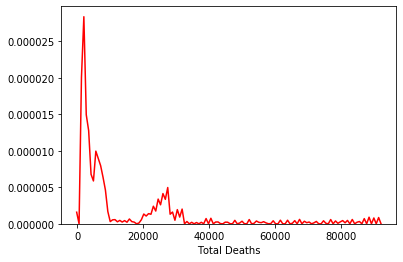

In [20]:
sns.distplot(df['Total Deaths'],color='r',hist=False)

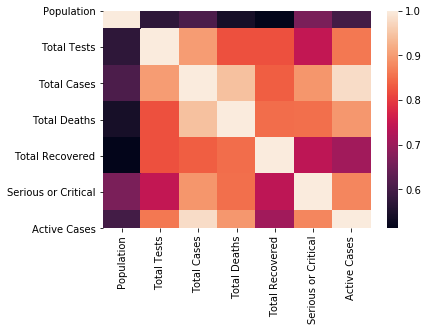

In [21]:
sns.heatmap(df.corr())

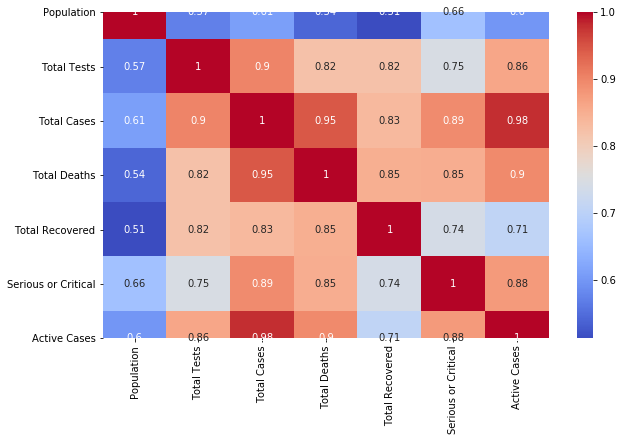

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [23]:
import datetime as dt

In [24]:
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,737533,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,737533,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,737533,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,737533,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
5,737533,Italy,60471924,1305833.0,175925.0,23227.0,44927.0,2733.0,107771.0


In [25]:
len(df['Country'].unique())

128

In [26]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [27]:
le=LabelEncoder()

In [28]:
df['Country']=le.fit_transform(df['Country'])
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,737533,121,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,737533,102,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,737533,113,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,737533,21,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
5,737533,62,60471924,1305833.0,175925.0,23227.0,44927.0,2733.0,107771.0


In [29]:
df.skew()

Date                  -0.008734
Country               -0.025321
Population             3.114406
Total Tests            7.163919
Total Cases            9.144735
Total Deaths           7.241007
Total Recovered        5.553082
Serious or Critical    6.756066
Active Cases           9.985893
dtype: float64

In [30]:
skew=('Population','Total Tests','Total Cases','Total Deaths','Total Recovered','Serious or Critical','Active Cases')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [31]:
df.skew()

Date                  -0.008734
Country               -0.025321
Population            -0.817254
Total Tests           -0.551022
Total Cases            0.054633
Total Deaths           0.660961
Total Recovered        0.142561
Serious or Critical    0.806742
Active Cases          -0.111121
dtype: float64

Date                       AxesSubplot(0.125,0.71587;0.133621x0.16413)
Country                 AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Population               AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Total Tests             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
Total Cases             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Deaths              AxesSubplot(0.125,0.518913;0.133621x0.16413)
Total Recovered        AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Serious or Critical     AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Active Cases           AxesSubplot(0.606034,0.518913;0.133621x0.16413)
dtype: object

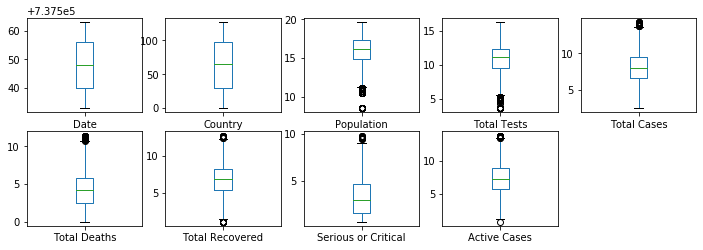

In [32]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(12,8))

In [33]:
df.shape

(3514, 9)

In [34]:
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,737533,121,19.616948,15.129811,13.512773,10.571701,11.131226,9.514289,13.355869
1,737533,102,18.798619,14.420860,10.513090,5.749393,8.025516,2.197225,10.417029
2,737533,113,17.660383,13.743188,12.177761,9.905685,11.222546,8.905444,11.508686
3,737533,21,19.173892,11.050668,10.511159,7.767264,9.548739,8.800114,9.920148
5,737533,62,17.917690,14.082352,12.077819,10.053114,10.712816,7.913521,11.587773


In [35]:
x=df.drop('Total Tests',axis=1)
x.shape

(3514, 8)

In [36]:
y=df['Total Tests']
y.head()

0    15.129811
1    14.420860
2    13.743188
3    11.050668
5    14.082352
Name: Total Tests, dtype: float64

In [37]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [38]:
y=le.fit_transform(y)
y

array([2319, 2278, 2215, ...,   18,  106,    7], dtype=int64)

In [39]:
models=[KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]

In [40]:
max_r2_score=0
for r_state in range(40,55):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.24,random_state=r_state)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        r2_value=r2_score(y_test,predm)
        print('R2 score correspond to random state',r_state ,'is',r2_value)
        if r2_value>max_r2_score:
            max_r2_score=r2_value
            final_state=r_state
            final_model=m
print()
print()
print()
print('Maximum r2 score correspond to random state',final_state,'is',max_r2_score,'and model is',final_model)

R2 score correspond to random state 40 is 0.977931355611012
R2 score correspond to random state 40 is 0.9939285737421674
R2 score correspond to random state 40 is 0.9920685288333696
R2 score correspond to random state 41 is 0.986449091098244
R2 score correspond to random state 41 is 0.9732965860558441
R2 score correspond to random state 41 is 0.9901955834757619
R2 score correspond to random state 42 is 0.9853262900734583
R2 score correspond to random state 42 is 0.9897714983697785
R2 score correspond to random state 42 is 0.9909256583607705
R2 score correspond to random state 43 is 0.9825266721724323
R2 score correspond to random state 43 is 0.9866765114587441
R2 score correspond to random state 43 is 0.9913342773025599
R2 score correspond to random state 44 is 0.9776367418016789
R2 score correspond to random state 44 is 0.9761811007387444
R2 score correspond to random state 44 is 0.9880284255398211
R2 score correspond to random state 45 is 0.9846571080340938
R2 score correspond to ran

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.24,random_state=40)

In [42]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
predrfr=rfr.predict(x_test)
print(r2_score(y_test,predrfr))
print(mean_squared_error(y_test,predrfr))
print(mean_absolute_error(y_test,predrfr))
print(np.sqrt(mean_absolute_error(y_test,predrfr)))

0.9911040497863907
4649.775817535545
33.21931279620853
5.763619765061582


Text(0, 0.5, 'Predicted values of Y')

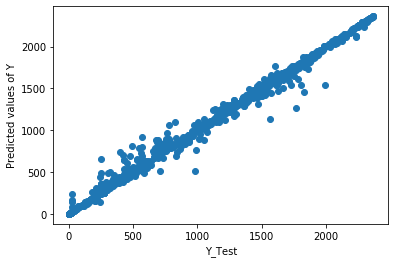

In [43]:
plt.scatter(y_test,predrfr)
plt.xlabel('Y_Test')
plt.ylabel('Predicted values of Y')

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
parameter={'n_estimators':range(10,20),'criterion':('mse','mae')}
grid=GridSearchCV(rfr,parameter)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('mse', 'mae'),
 

In [46]:
rfr=RandomForestRegressor(criterion='mse',n_estimators=18)
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
predrfr=rfr.predict(x_test)
print(r2_score(y_test,predrfr))
print(mean_squared_error(y_test,predrfr))
print(mean_absolute_error(y_test,predrfr))
print(np.sqrt(mean_absolute_error(y_test,predrfr)))

0.9923405805597038
4003.4602751448133
31.246774618220112
5.5898814493887174


In [47]:
score=cross_val_score(rfr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.90124076 0.97958391 0.98903188 0.98230109 0.93122154]
0.956675836671122
0.03449439322919329


In [48]:
from sklearn.externals import joblib

In [49]:
joblib.dump(rfr,'CountryCovidFile.obj')

['CountryCovidFile.obj']